In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


In [2]:
from pandas import datetime
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

GDP = pd.read_csv('GDP.csv', parse_dates=[0], date_parser = parser, index_col = 0)
GDP.head()

,GDP Change
observation_date,
1963-01-01,5.5
1964-01-01,7.4
1965-01-01,8.4
1966-01-01,9.6
1967-01-01,5.7


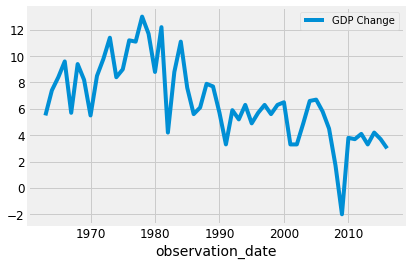

In [3]:
GDP.plot()

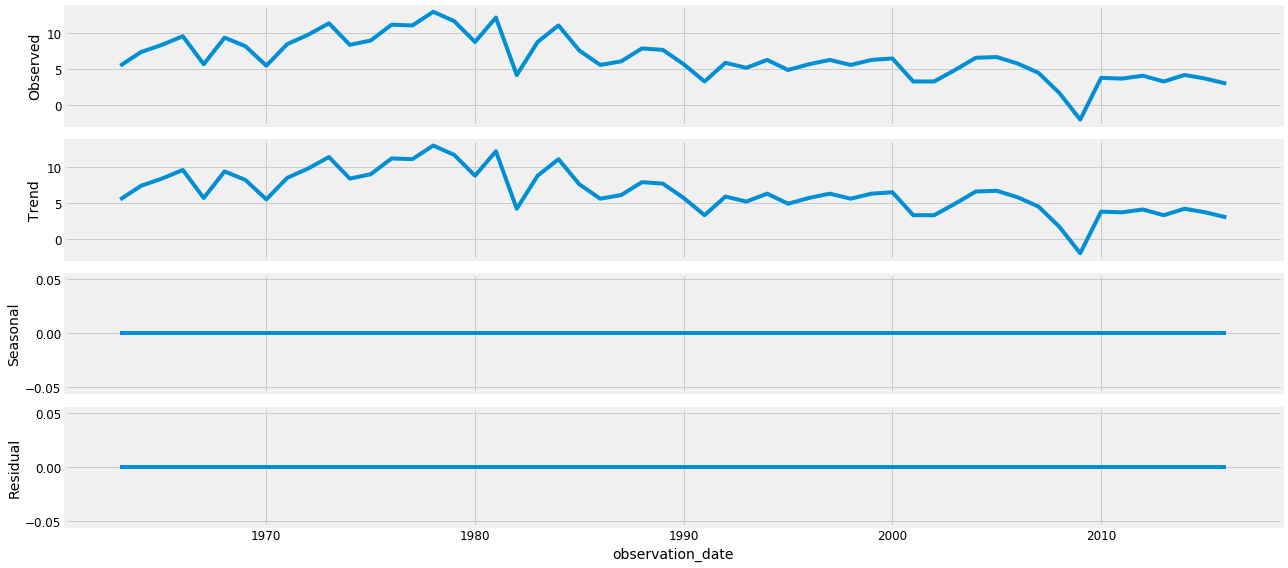

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(GDP, model='additive')
fig = decomposition.plot()
plt.show()

In [18]:
model1 = sm.tsa.ARIMA(GDP, order=(1, 1, 1))
results = model1.fit()
print(results.summary().tables[1])


                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1210      0.029     -4.221      0.000      -0.177      -0.065
ar.L1.D.GDP Change     0.4034      0.135      2.992      0.004       0.139       0.668
ma.L1.D.GDP Change    -1.0000      0.086    -11.579      0.000      -1.169      -0.831


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [19]:
predictions1 = model1.forecast(steps = 15)[0]

AttributeError: 'ARIMA' object has no attribute 'forecast'

In [15]:
mod = sm.tsa.statespace.SARIMAX(GDP,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2798      0.309      0.904      0.366      -0.327       0.886
ma.L1         -1.0000   3438.710     -0.000      1.000   -6740.747    6738.747
ar.S.L12      -0.4841      0.143     -3.393      0.001      -0.764      -0.204
sigma2         5.2038   1.79e+04      0.000      1.000   -3.51e+04    3.51e+04


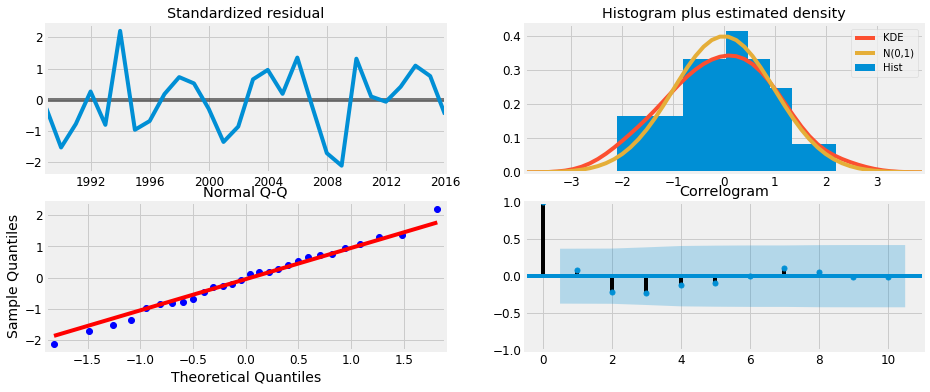

In [16]:
results.plot_diagnostics(figsize=(14, 6))
plt.show()

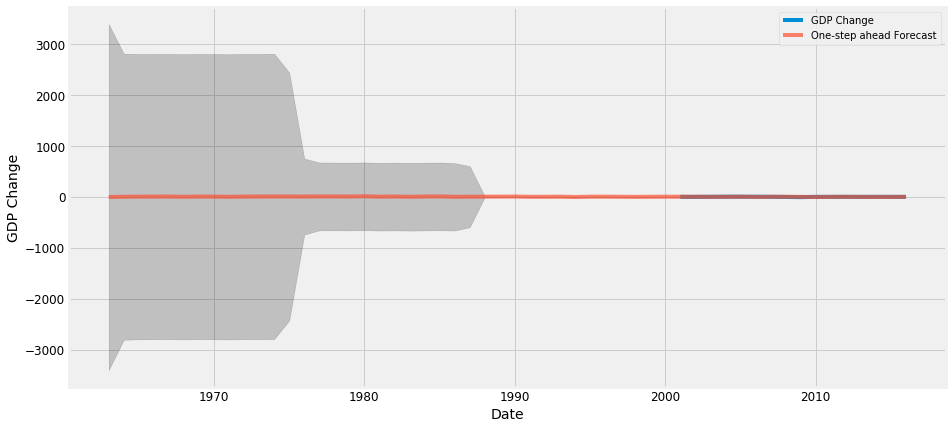

In [17]:
pred = results.get_prediction(start=pd.to_datetime('1963-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = GDP['2001':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('GDP Change')
plt.legend()
plt.show()